In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("UberDataset.csv")

In [3]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
df.shape

(1156, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [6]:
df['PURPOSE'].fillna("NOT", inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_4788\1469337574.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PURPOSE'].fillna("NOT", inplace=True)


In [7]:
#Changing the START_DATE and END_DATE to the date_time format
df['START_DATE']=pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE']=pd.to_datetime(df['END_DATE'], errors='coerce')

In [9]:
#Splitting the START_DATE to date and time column and 
#then converting the time into four different categories i.e. Morning, Afternoon, Evening, Night

from datetime import datetime

df['date']=pd.DatetimeIndex(df['START_DATE']).date
df['time']=pd.DatetimeIndex(df['START_DATE']).hour

#changing into categories of day and night
df['day-night']=pd.cut(x=df['time'],bins=[0,10,15,19,24],labels=['Morning', 'Afternoon', 'Evening', 'Night'])


In [10]:
#dropping rows with null values
df.dropna(inplace=True)

In [11]:
#dropping the duplicates rows from the dataset
df.drop_duplicates(inplace=True)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'NOT'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices')])

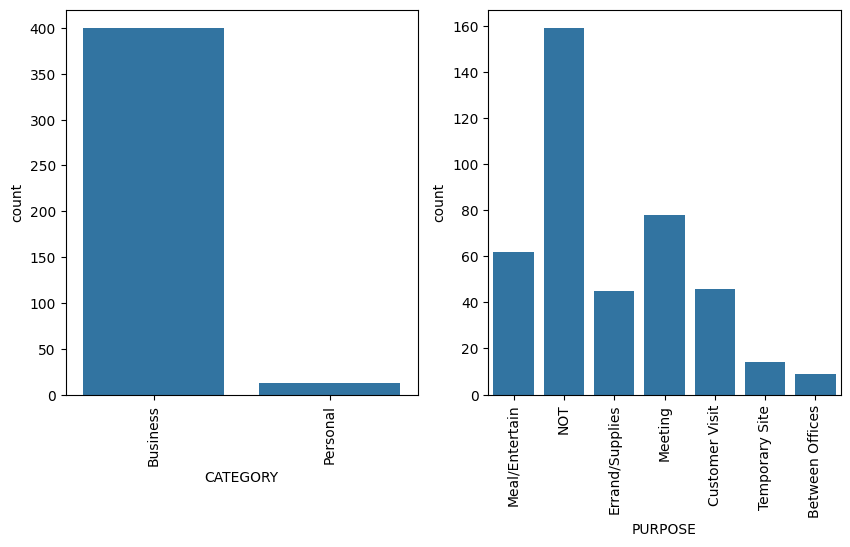

In [33]:
#Now, using matplotlib and seaborn library for countplot the CATEGORY and PURPOSE columns

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x='CATEGORY', data=df)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='PURPOSE', data=df)
plt.xticks(rotation=90)

([0, 1, 2, 3],
 [Text(0, 0, 'Morning'),
  Text(1, 0, 'Afternoon'),
  Text(2, 0, 'Evening'),
  Text(3, 0, 'Night')])

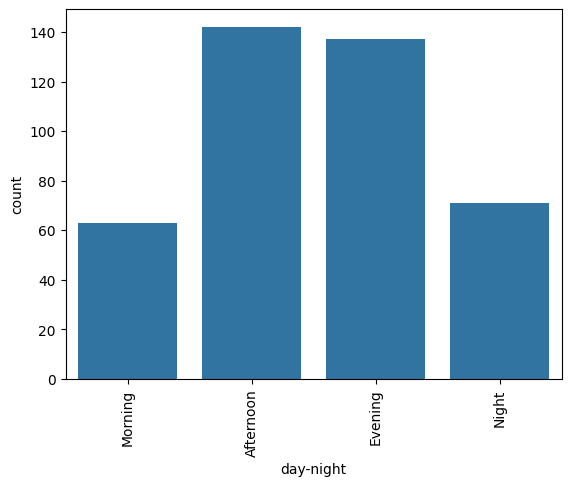

In [30]:
#Let’s do the same for time column i.e day-night column using matplotlib and seaborn library
sns.countplot(x='day-night', data=df)
plt.xticks(rotation=90)

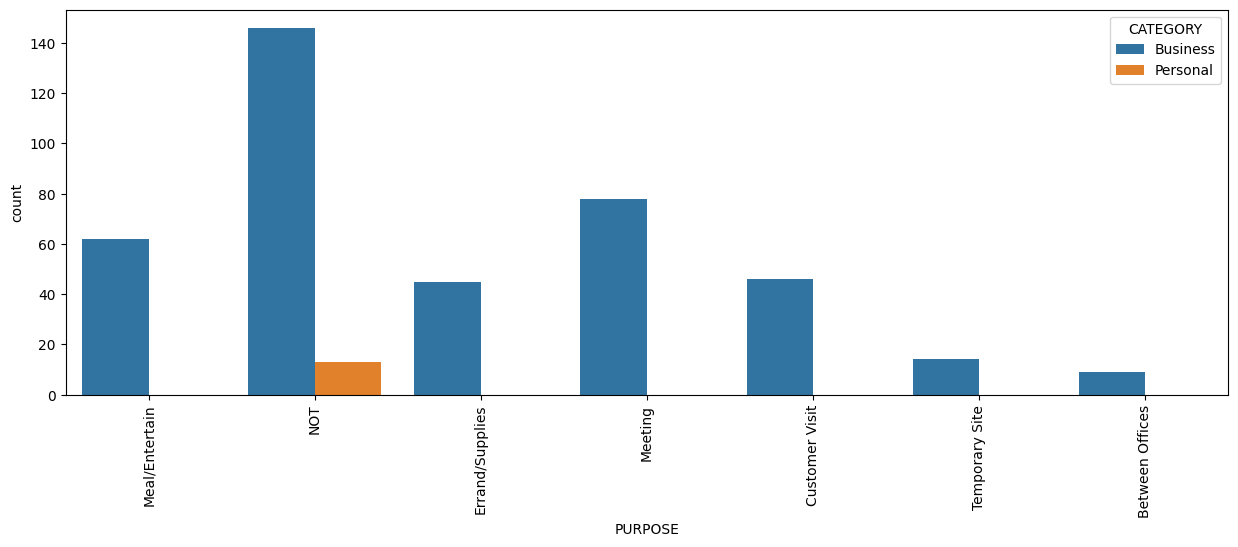

In [34]:
#Now, comparing the two different categories along with the PURPOSE of the user
plt.figure(figsize=(15, 5))
sns.countplot(x='PURPOSE', data=df, hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()


Insights from the above count-plots : 
Most of the rides are booked for business purpose.
Most of the people book cabs for Meetings and Meal / Entertain purpose.
Most of the cabs are booked in the time duration of 10am-5pm (Afternoon).

In [36]:
!pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 217.9 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 404.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.9 MB 4.5 MB/s eta 0:00:03
    --------------------------------------- 0.2/10.9 MB 4.1 MB/s eta 0:00:03
   - -------------------------------------- 0.4/10.9 MB 4.6 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/10.9 MB 4.5 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/10.9 MB 4.9 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/10.9 MB 5.4 MB/s eta 0:00:02
   ------ ---------


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
from sklearn.preprocessing import OneHotEncoder
object_cols = ['CATEGORY', 'PURPOSE']
OH_encoder = OneHotEncoder(sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))
OH_cols.index = df.index
OH_cols.columns = OH_encoder.get_feature_names_out(object_cols)
df_final = df.drop(object_cols, axis=1)
df = pd.concat([df_final, OH_cols], axis=1)

<Axes: >

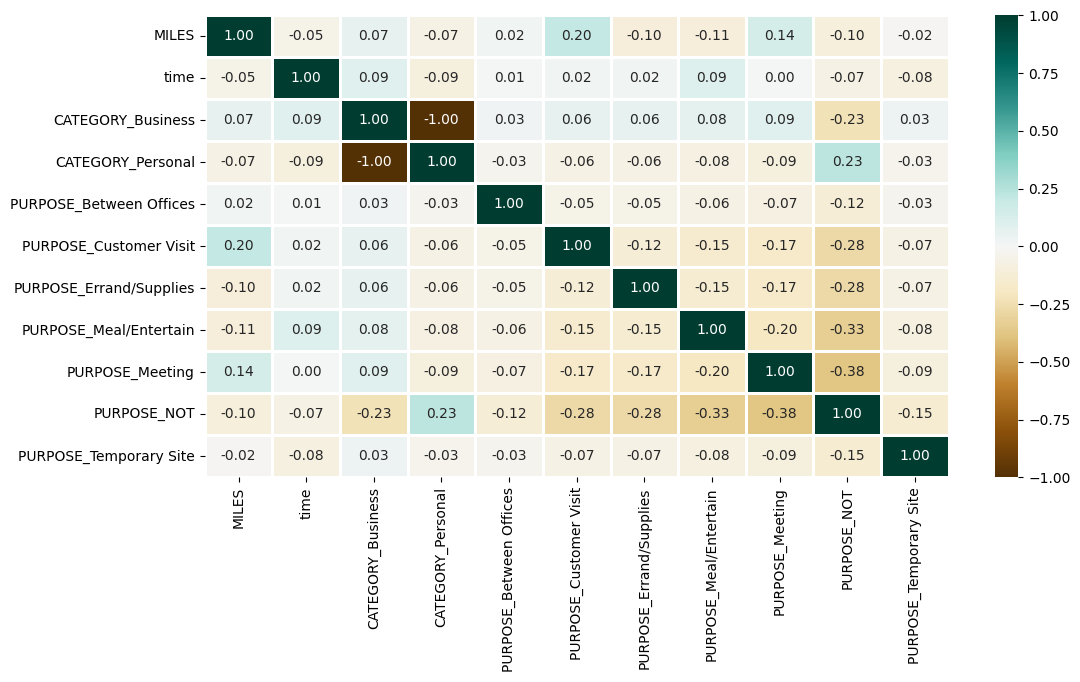

In [43]:
# now finding the correlation between the columns using heatmap.
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), cmap='BrBG', fmt='.2f', linewidths=2, annot=True)

Insights from the heatmap:
Business and Personal Category are highly negatively correlated, this have already proven earlier. So this plot, justifies the above conclusions.
There is not much correlation between the features.

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

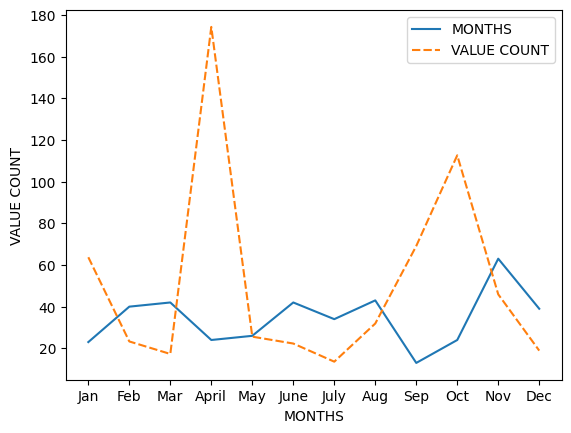

In [44]:
#Now we will visualize the month data
df['MONTH'] = pd.DatetimeIndex(df['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
			5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
			9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
df["MONTH"] = df.MONTH.map(month_label)

mon = df.MONTH.value_counts(sort=False)

# Month total rides count vs Month ride max count
df = pd.DataFrame({"MONTHS": mon.values, "VALUE COUNT": df.groupby('MONTH', sort=False)['MILES'].max()})
p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")


Insights from the above plot : 
The counts are very irregular.
Still its very clear that the counts are very less during Nov, Dec, Jan, which justifies the fact that  time winters are there in Florida, US.